Note: run these cells after data preprocessing done in "Project.ipynb"

# Cancelation Analyzis

### 1) Cancelation by Hotel type

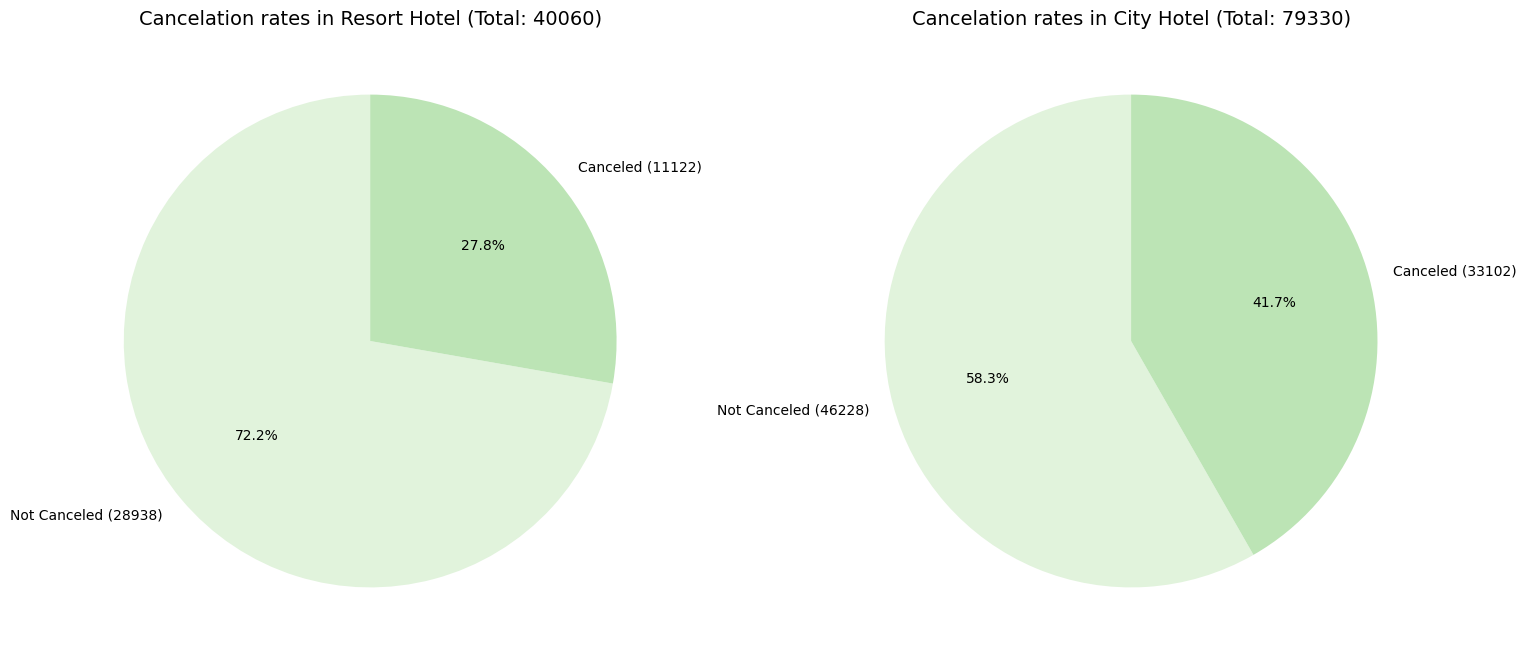

In [ ]:
hotel_counts = df.groupby(['hotel', 'is_canceled']).size().unstack(fill_value=0)
hotel_totals = hotel_counts.sum(axis=1)

# -------------Cancelation rates in Resort Hotel-------------
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
resort_data = hotel_counts.loc['Resort Hotel']
axes[0].pie(
    resort_data, 
    labels=[f"Not Canceled ({resort_data[0]})", f"Canceled ({resort_data[1]})"], 
    autopct=lambda p: f"{p:.1f}%",
    startangle=90, 
    colors=sns.color_palette("Greens"))
axes[0].set_title(f"Cancelation rates in Resort Hotel (Total: {hotel_totals['Resort Hotel']})", fontsize=14)
# -------------Cancelation rates in City Hotel-------------
city_data = hotel_counts.loc['City Hotel']
axes[1].pie(
    city_data, 
    labels=[f"Not Canceled ({city_data[0]})", f"Canceled ({city_data[1]})"], 
    autopct=lambda p: f"{p:.1f}%",
    startangle=90, 
    colors=sns.color_palette("Greens"))
axes[1].set_title(f"Cancelation rates in City Hotel (Total: {hotel_totals['City Hotel']})", fontsize=14)

plt.show()

Resort Hotels show a lower cancellation rate of 27.8%, with most bookings (72.2%) being honored, indicating more stable reservation patterns, likely due to leisure-focused travel. In contrast, City Hotels have a significantly higher cancellation rate of 41.7%, suggesting greater booking volatility, possibly due to business travel or short-term stays. This highlights differing customer behaviors and the need for tailored booking strategies for each hotel type.

### 2) Cancelation by Month

<Figure size 1400x800 with 0 Axes>

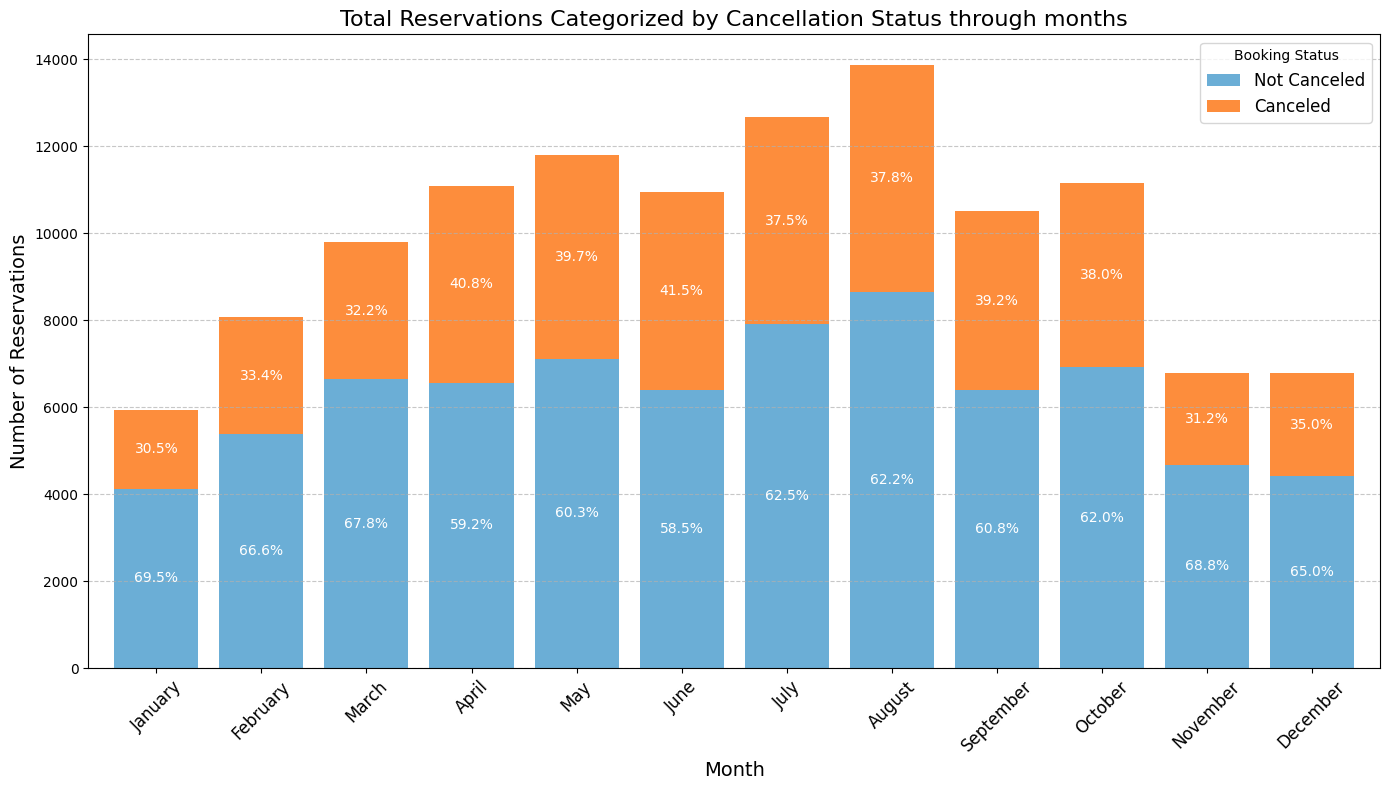

In [ ]:
#  months
months_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_data = df.groupby(['arrival_date_month', 'is_canceled']).size().unstack(fill_value=0).reindex(months_order)
monthly_percent = monthly_data.div(monthly_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 8))
monthly_data.plot(kind='bar', stacked=True, width=0.8, color=['#6baed6', '#fd8d3c'], figsize=(14, 8))
plt.title("Total Reservations Categorized by Cancellation Status through months", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Reservations", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.legend(["Not Canceled", "Canceled"], title="Booking Status", fontsize=12)
for i, (index, row) in enumerate(monthly_percent.iterrows()):
    for j, value in enumerate(row):
        plt.text(i, 
            monthly_data.iloc[i].cumsum()[j] - (monthly_data.iloc[i, j] / 2), 
            f"{value:.1f}%", 
            ha="center", 
            va="center", 
            color="white", 
            fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

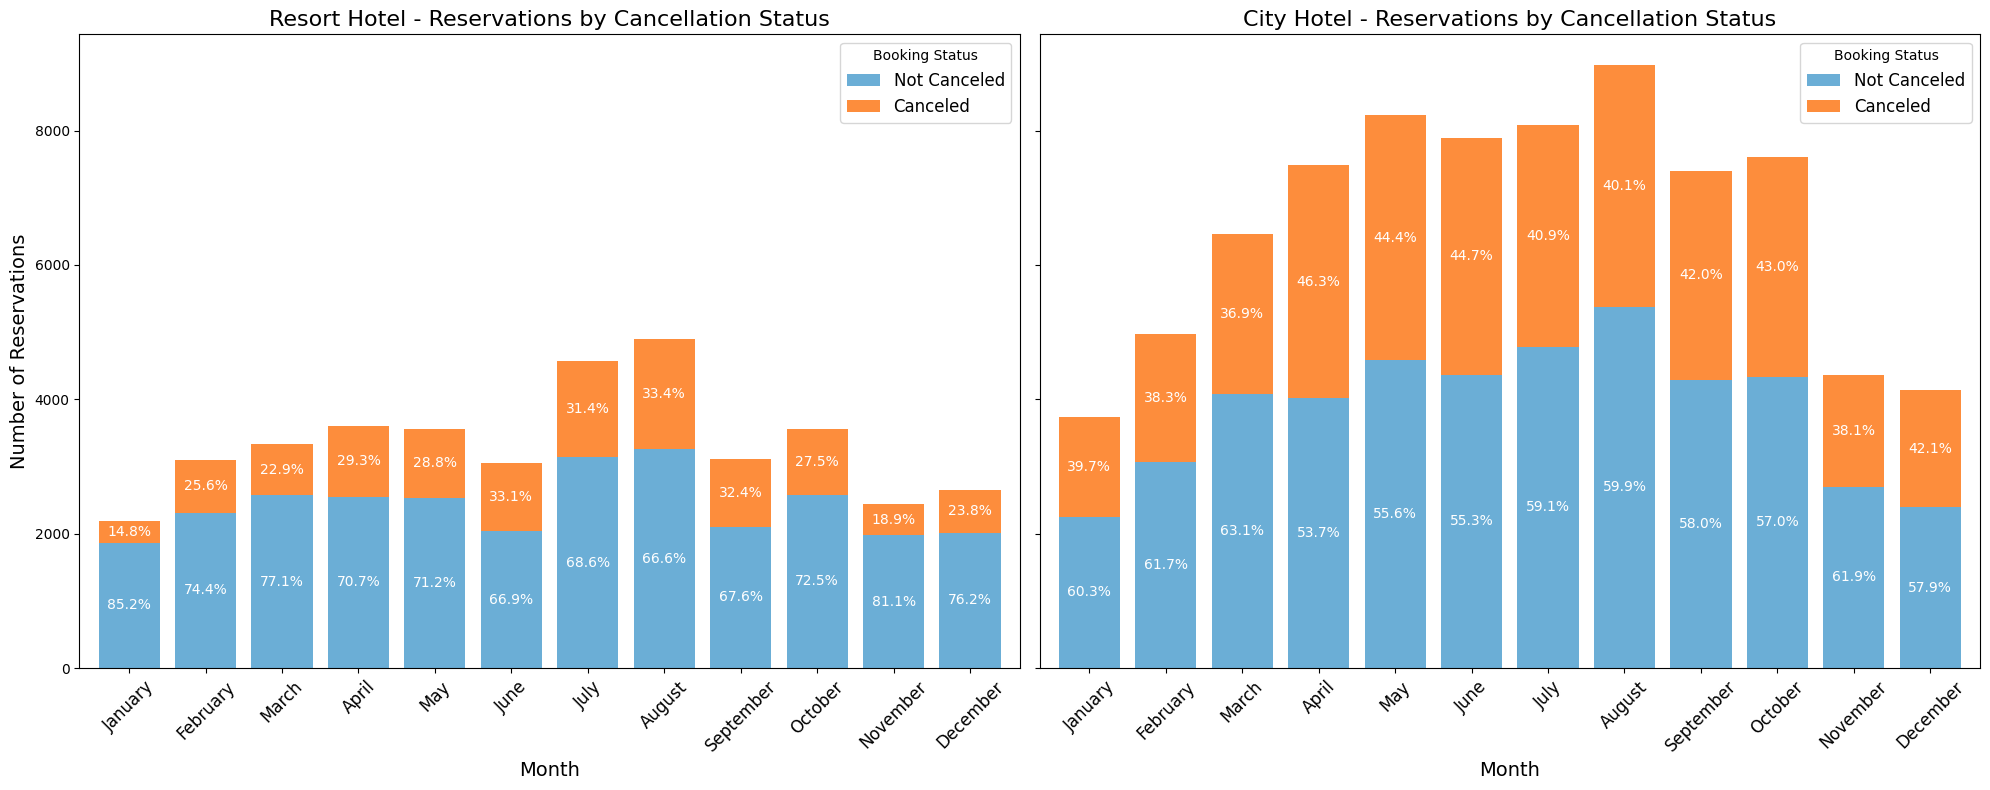

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
hotel_types = df['hotel'].unique()

for ax, hotel in zip(axes, hotel_types):
    hotel_data = df[df['hotel'] == hotel]
    monthly_data = hotel_data.groupby(['arrival_date_month', 'is_canceled']).size().unstack(fill_value=0).reindex(months_order)
    monthly_percent = monthly_data.div(monthly_data.sum(axis=1), axis=0) * 100
    monthly_data.plot(kind='bar', stacked=True, width=0.8, color=['#6baed6', '#fd8d3c'], ax=ax)
    ax.set_title(f"{hotel} - Reservations by Cancellation Status", fontsize=16)
    ax.set_xlabel("Month", fontsize=14)
    ax.set_ylabel("Number of Reservations", fontsize=14)
    ax.set_xticks(range(len(months_order)))
    ax.set_xticklabels(months_order, rotation=45, fontsize=12)
    ax.legend(["Not Canceled", "Canceled"], title="Booking Status", fontsize=12)
    for i, (index, row) in enumerate(monthly_percent.iterrows()):
        for j, value in enumerate(row):
            ax.text(i, 
            monthly_data.iloc[i].cumsum()[j] - (monthly_data.iloc[i, j] / 2), 
            f"{value:.1f}%", 
            ha="center", 
            va="center", 
            color="white", 
            fontsize=10)

plt.tight_layout()
plt.show()



The side-by-side stacked bar charts compare cancellation trends for Resort Hotels and City Hotels across the year. **Resort Hotels** exhibit lower cancellation rates, consistently below 35% for most months, with higher stability during off-peak months like January and November (cancellation rates around 15-20%). In contrast, **City Hotels** show much higher cancellation rates, peaking above 45% during the spring and summer months, reflecting more volatile booking patterns. These trends highlight the differences in customer behavior between leisure-oriented resorts and business-focused city accommodations.

### 3) Cancelation by Lead Time

<Figure size 1200x600 with 0 Axes>

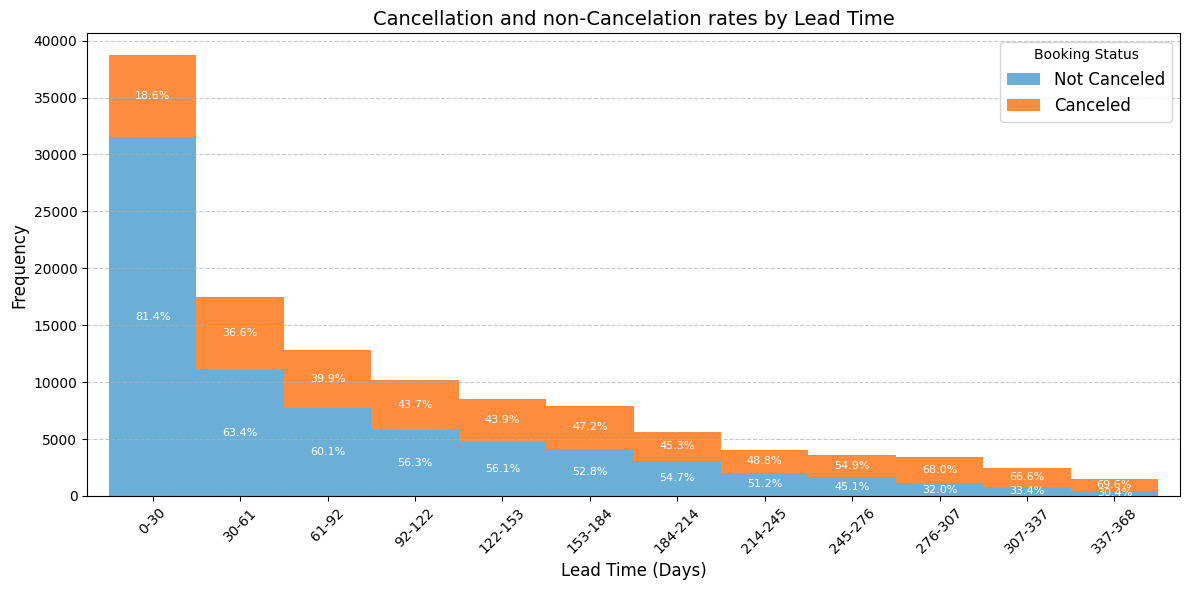

In [ ]:
bins = 24 # I have used this bining because it's the closest to 30 days = month
bin_edges = np.histogram_bin_edges(df['lead_time'], bins=bins)

hist_data = pd.DataFrame({
    'Not Canceled': np.histogram(df[df['is_canceled'] == 0]['lead_time'], bins=bin_edges)[0],
    'Canceled': np.histogram(df[df['is_canceled'] == 1]['lead_time'], bins=bin_edges)[0]
}, index=pd.IntervalIndex.from_breaks(bin_edges, closed='left'))
hist_percent = hist_data.div(hist_data.sum(axis=1), axis=0) * 100
valid_bins = hist_data.sum(axis=1) >= 1000
filtered_hist_data = hist_data[valid_bins]
filtered_hist_percent = hist_percent[valid_bins]

plt.figure(figsize=(12, 6))
ax = filtered_hist_data.plot(kind='bar', stacked=True, color=['#6baed6', '#fd8d3c'], figsize=(12, 6), width=1)
for i, (index, row) in enumerate(filtered_hist_percent.iterrows()):
    for j, value in enumerate(row):
        plt.text(i, 
            filtered_hist_data.iloc[i].cumsum()[j] - (filtered_hist_data.iloc[i, j] / 2), 
            f"{value:.1f}%", 
            ha="center", 
            va="center", 
            color="white", 
            fontsize=8)

plt.title("Cancellation and non-Cancelation rates by Lead Time", fontsize=14)
plt.xlabel("Lead Time (Days)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(["Not Canceled", "Canceled"], title="Booking Status", fontsize=12)
plt.xticks(ticks=range(len(filtered_hist_data)), 
    labels=[f"{int(interval.left)}-{int(interval.right)}" for interval in filtered_hist_data.index], 
    rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

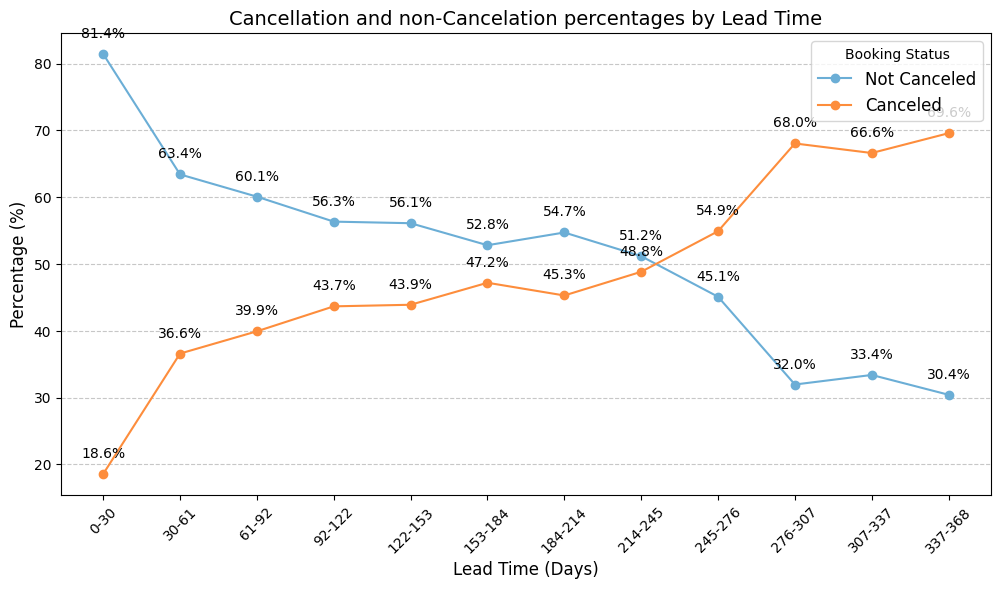

In [ ]:
bins = 24
bin_edges = np.histogram_bin_edges(df['lead_time'], bins=bins)
hist_data = pd.DataFrame({
    'Not Canceled': np.histogram(df[df['is_canceled'] == 0]['lead_time'], bins=bin_edges)[0],
    'Canceled': np.histogram(df[df['is_canceled'] == 1]['lead_time'], bins=bin_edges)[0]
}, index=pd.IntervalIndex.from_breaks(bin_edges, closed='left'))
hist_percent = hist_data.div(hist_data.sum(axis=1), axis=0) * 100
valid_bins = hist_data.sum(axis=1) >= 1000
filtered_hist_percent = hist_percent[valid_bins]
rounded_bins = [f"{int(bin.left)}-{int(bin.right)}" for bin in filtered_hist_percent.index]


plt.figure(figsize=(12, 6))
plt.plot(rounded_bins, filtered_hist_percent['Not Canceled'], label="Not Canceled", color='#6baed6', marker='o')
plt.plot(rounded_bins, filtered_hist_percent['Canceled'], label="Canceled", color='#fd8d3c', marker='o')
for i, (index, row) in enumerate(filtered_hist_percent.iterrows()):
    plt.text(i, row['Not Canceled'] + 2, f"{row['Not Canceled']:.1f}%", ha="center", va="bottom", fontsize=10)
    plt.text(i, row['Canceled'] + 2, f"{row['Canceled']:.1f}%", ha="center", va="bottom", fontsize=10)

plt.title("Cancellation and non-Cancelation percentages by Lead Time", fontsize=14)
plt.xlabel("Lead Time (Days)", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Booking Status", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The graph illustrates cancellation and non-cancellation percentages based on lead time. For shorter lead times (0-30 days), the majority of bookings (81.4%) are not canceled, but cancellation rates gradually increase with longer lead times. At lead times exceeding 214 days, cancellations consistently surpass non-cancellations, peaking at 69% for the 337-368 days range. This trend suggests that bookings made far in advance are more prone to cancellations, likely due to changing plans or uncertainties over time.

### 4) Cancelation by Market Segment

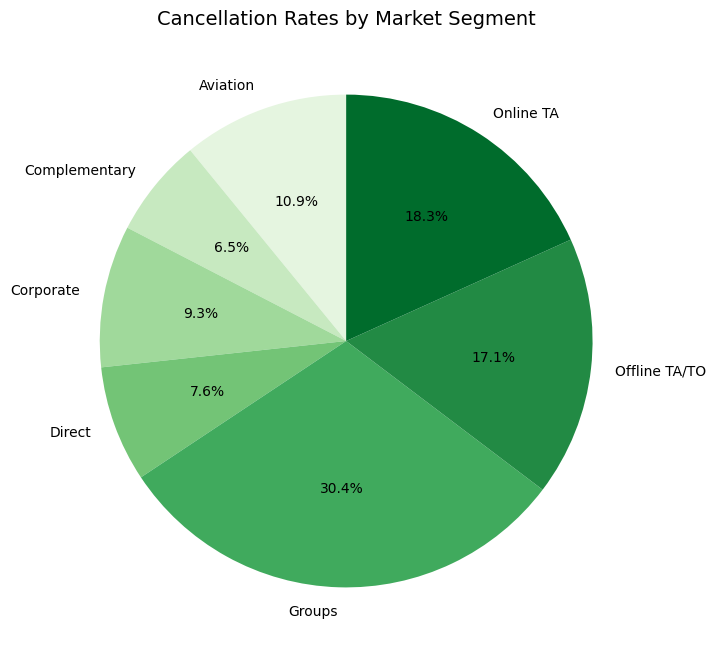

In [ ]:
market_segment_cancellation_rates = df.groupby('market_segment')['is_canceled'].mean() * 100
market_segment_cancellation_rates = market_segment_cancellation_rates[market_segment_cancellation_rates.index != 'Undefined']

plt.figure(figsize=(8, 8))
plt.pie(market_segment_cancellation_rates, 
        labels=market_segment_cancellation_rates.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette("Greens", n_colors=len(market_segment_cancellation_rates)))
plt.title("Cancellation Rates by Market Segment", fontsize=14)
plt.show()

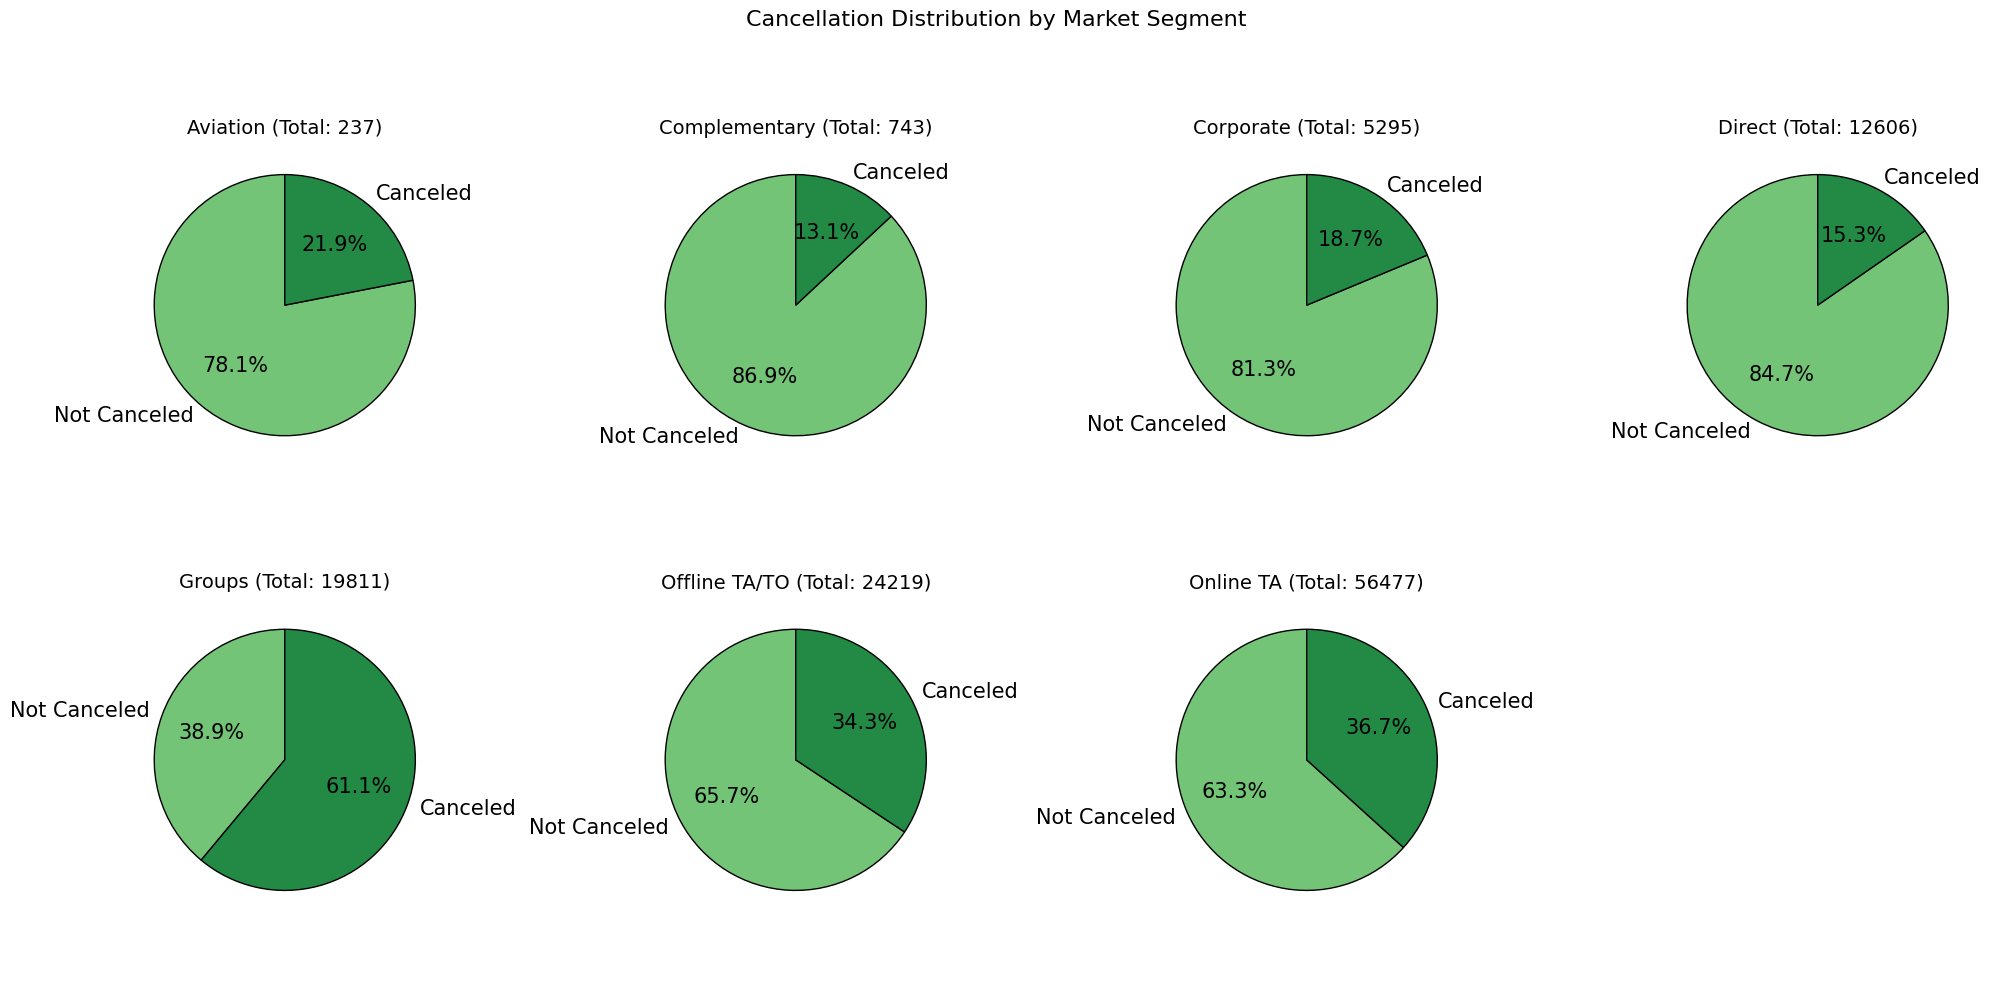

In [ ]:
market_segment_cancellation = df.groupby(['market_segment', 'is_canceled']).size().unstack(fill_value=0)
market_segment_cancellation = market_segment_cancellation[market_segment_cancellation.index != 'Undefined']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()
for i, (segment, row) in enumerate(market_segment_cancellation.iterrows()):
    total = row.sum()
    canceled_count = row[1]
    not_canceled_count = row[0]
    axes[i].pie([not_canceled_count, canceled_count], 
                labels=["Not Canceled", "Canceled"], 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=['#73c477', '#238a45'],
                wedgeprops={'edgecolor': 'black'},
                textprops={'fontsize': 15})
    axes[i].set_title(f"{segment} (Total: {total})", fontsize=14)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
fig.suptitle("Cancellation Distribution by Market Segment", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

The graphs illustrate hotel cancellation patterns by market segment. The first chart highlights that "Groups" account for the highest cancellation rate (30.4%), followed by "Online TA" (18.3%) and "Offline TA/TO" (17.1%). In contrast, segments like "Complementary" and "Corporate" exhibit significantly lower cancellation rates, at 6.5% and 9.3%, respectively. The second set of charts further breaks down cancellations within each segment. Notably, "Groups," "Online TA," and "Offline TA/TO" show relatively high percentages of cancellations (61.1%, 36.7%, and 34.3%), indicating these segments contribute heavily to overall cancellations. Conversely, "Complementary" and "Corporate" segments maintain lower cancellation ratios, suggesting more reliable bookings. These insights could guide strategies to minimize cancellations, particularly within the high-risk segments.

### 5) Cancelation by Distribution channel

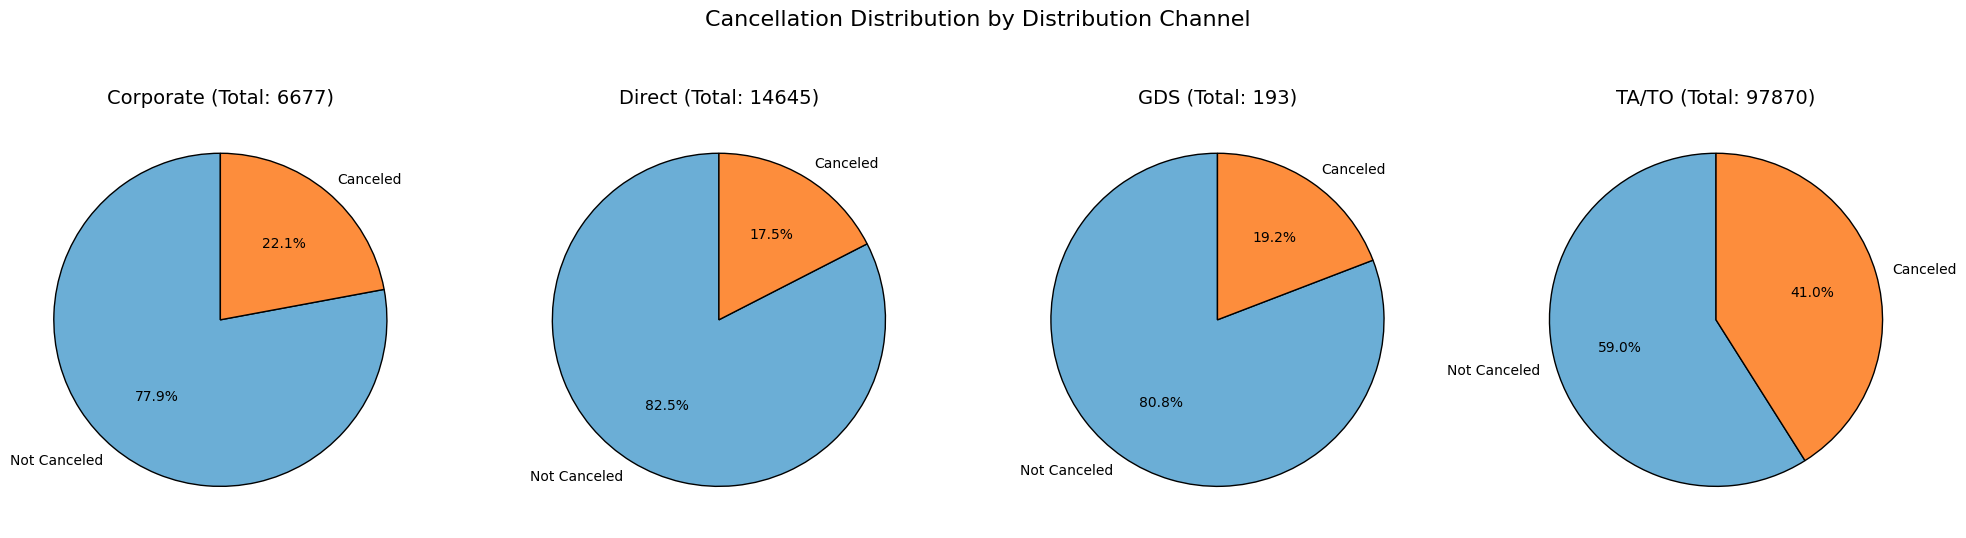

In [ ]:
distribution_channel_cancellation = df.groupby(['distribution_channel', 'is_canceled']).size().unstack(fill_value=0)
distribution_channel_cancellation = distribution_channel_cancellation[distribution_channel_cancellation.index != 'Undefined']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
for i, (channel, row) in enumerate(distribution_channel_cancellation.iterrows()):
    total = row.sum()
    canceled_count = row[1]
    not_canceled_count = row[0]
    axes[i].pie([not_canceled_count, canceled_count], 
                labels=["Not Canceled", "Canceled"], 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=['#6baed6', '#fd8d3c'],
                wedgeprops={'edgecolor': 'black'})
    axes[i].set_title(f"{channel} (Total: {total})", fontsize=14)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
fig.suptitle("Cancellation Distribution by Distribution Channel", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

The graphs show hotel cancellation distributions across different distribution channels. "TA/TO" (Travel Agents/Tour Operators) stands out with the highest cancellation rate at 41%, indicating it is a significant driver of cancellations. In contrast, channels like "Direct," "Corporate," and "GDS" (Global Distribution System) have notably lower cancellation rates, at 17.5%, 22.1%, and 19.2%, respectively, suggesting these channels are more reliable. Despite the high cancellation rate for "TA/TO," its large volume of bookings (97,870 total) makes it critical for revenue. These insights suggest that managing cancellations within the "TA/TO" channel should be a priority while leveraging the stability of direct and corporate channels.

### 6) Cancelation by Customer type

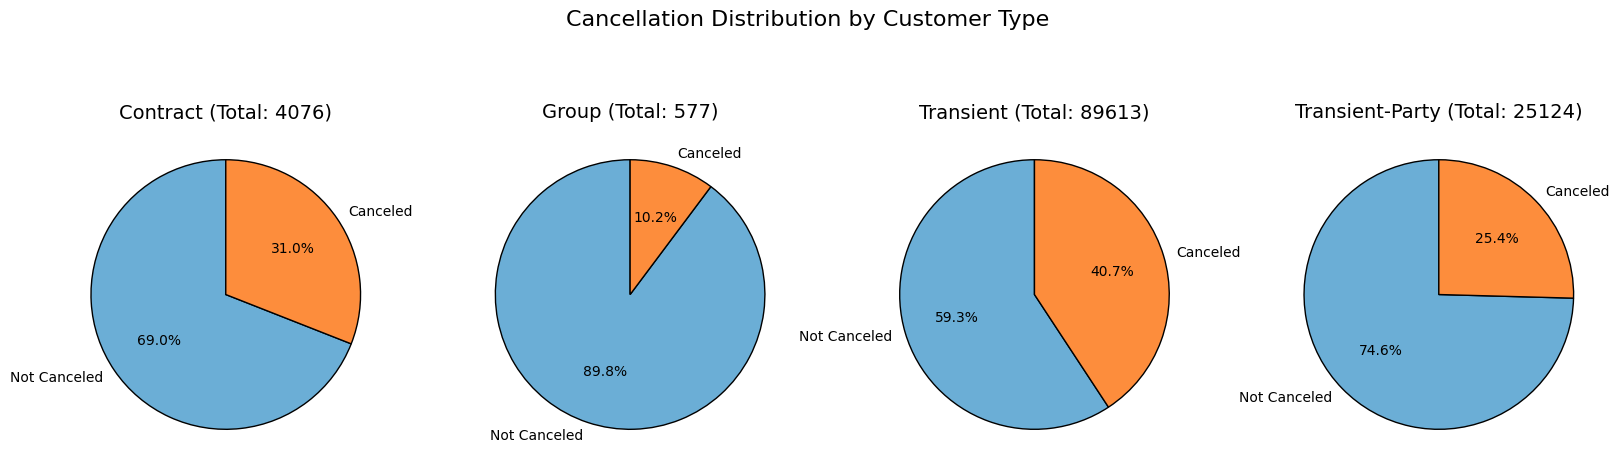

In [ ]:
customer_type_cancellation = df.groupby(['customer_type', 'is_canceled']).size().unstack(fill_value=0)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))
for i, (customer, row) in enumerate(customer_type_cancellation.iterrows()):
    total = row.sum()
    canceled_count = row[1]
    not_canceled_count = row[0]
    axes[i].pie([not_canceled_count, canceled_count], 
                labels=["Not Canceled", "Canceled"], 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=['#6baed6', '#fd8d3c'],
                wedgeprops={'edgecolor': 'black'})
    axes[i].set_title(f"{customer} (Total: {total})", fontsize=14)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
fig.suptitle("Cancellation Distribution by Customer Type", fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()


The graphs illustrate hotel booking cancellations based on customer types. The Transient category has the highest cancellation rate at 40.7%, which is significant given its large volume (89,613 total bookings). This indicates transient customers are less committed to their bookings.

In contrast, Group customers have the lowest cancellation rate at only 10.2%, suggesting more reliability in group bookings.

Transient-Party customers exhibit a moderate cancellation rate of 25.4%, whereas Contract customers show a relatively higher cancellation rate at 31.0%, which may indicate some flexibility in contract agreements or last-minute changes.

These patterns highlight the need for strategies to mitigate cancellations, particularly in the transient segment, while maintaining engagement with groups and transient-party customers.

### 7) Cancelation by Room type

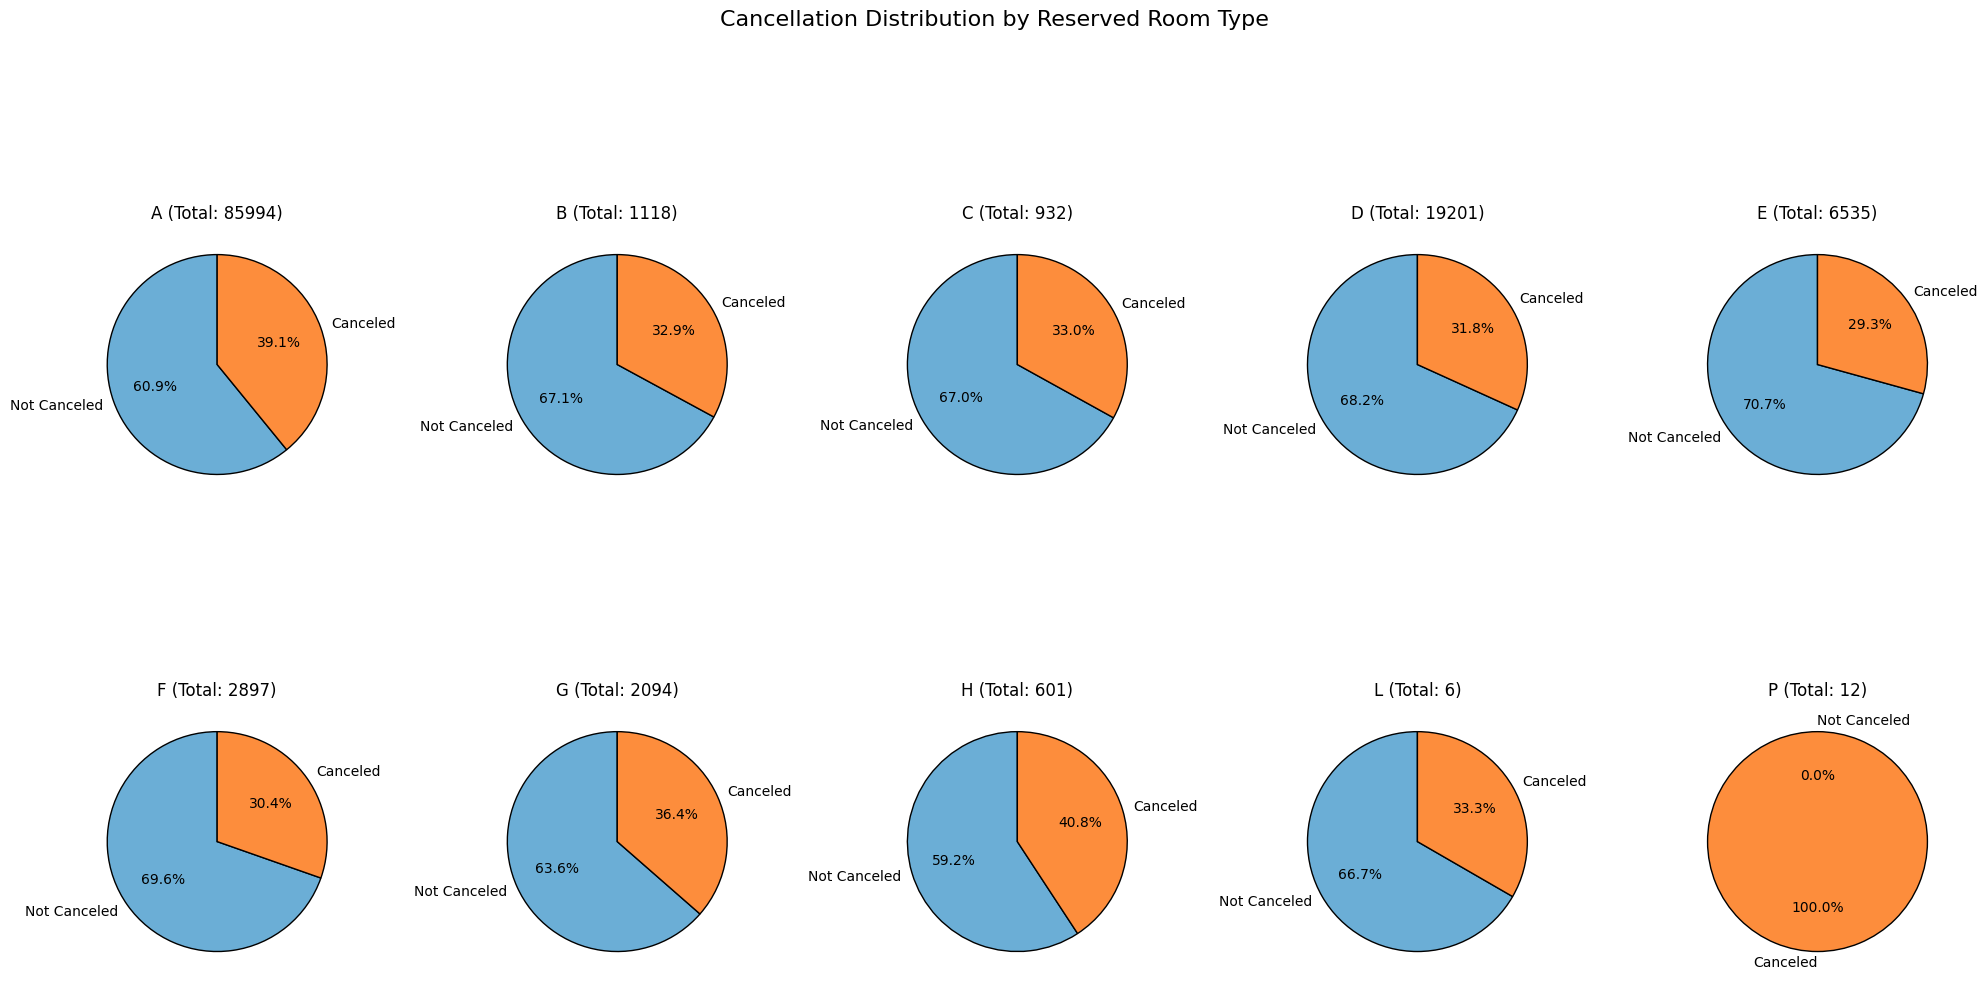

In [ ]:
reserved_room_type_cancellation = df.groupby(['reserved_room_type', 'is_canceled']).size().unstack(fill_value=0)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12))
axes = axes.flatten()
for i, (room_type, row) in enumerate(reserved_room_type_cancellation.iterrows()):
    total = row.sum() 
    canceled_count = row[1]
    not_canceled_count = row[0]
    axes[i].pie([not_canceled_count, canceled_count], 
                labels=["Not Canceled", "Canceled"], 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=['#6baed6', '#fd8d3c'],
                wedgeprops={'edgecolor': 'black'})
    axes[i].set_title(f"{room_type} (Total: {total})", fontsize=12)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
fig.suptitle("Cancellation Distribution by Reserved Room Type", fontsize=16)
plt.subplots_adjust(top=1)
plt.tight_layout()
plt.show()

### 8) Cancelation by Deposit type

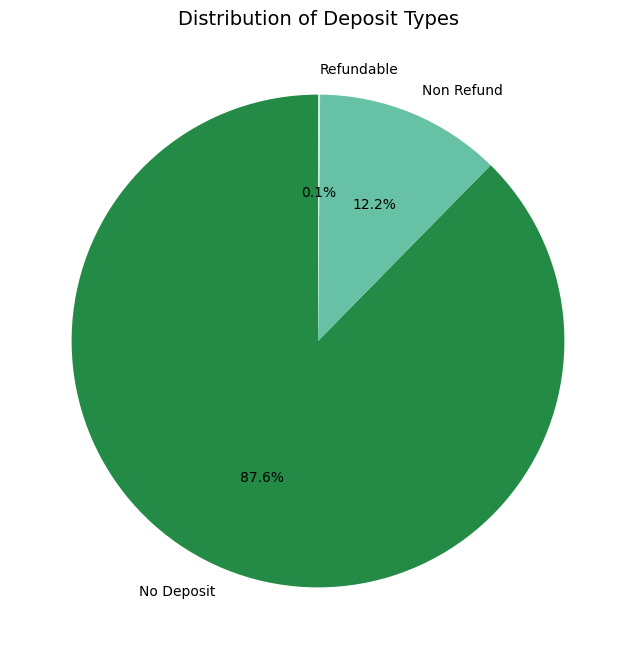

In [ ]:
deposit_type_counts = df['deposit_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(deposit_type_counts, 
        labels=deposit_type_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette("BuGn_r", n_colors=len(deposit_type_counts)))
plt.title("Distribution of Deposit Types", fontsize=14)
plt.show()

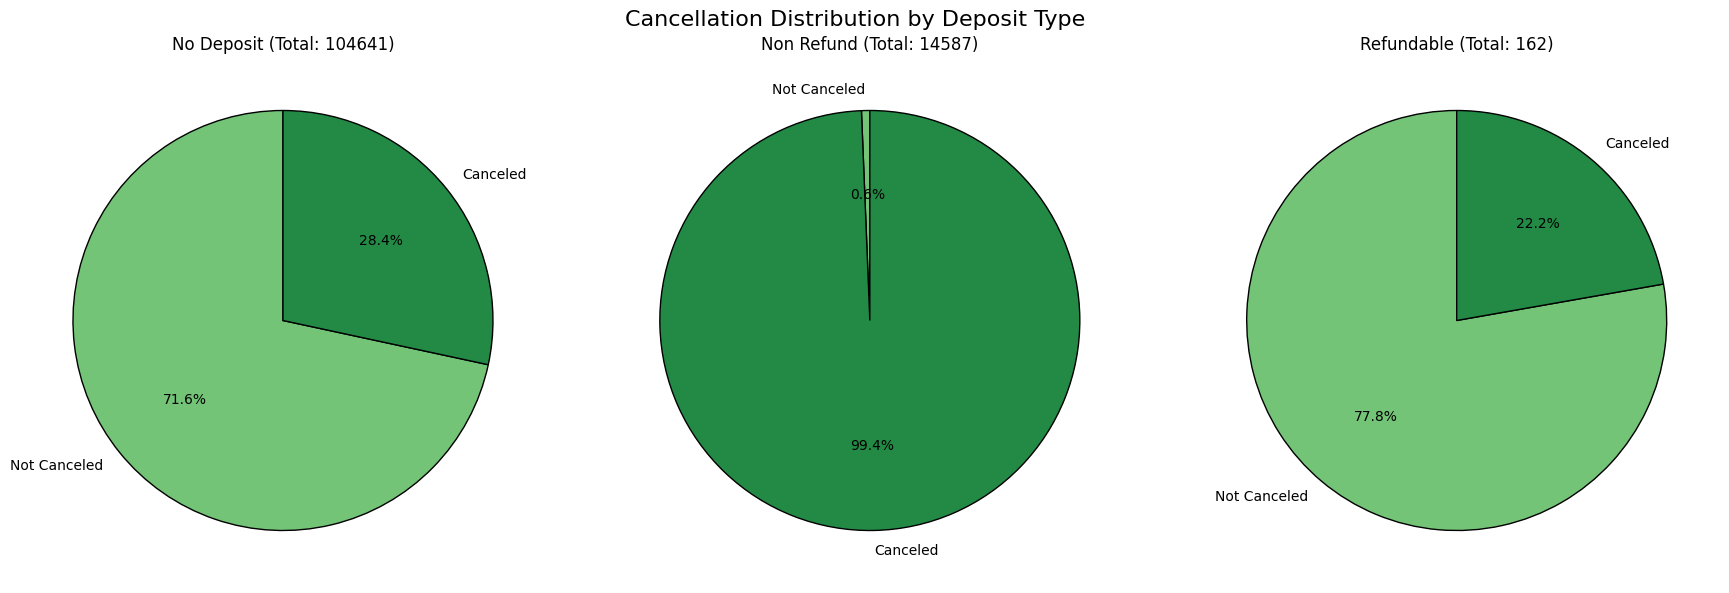

In [ ]:
deposit_type_cancellation = df.groupby(['deposit_type', 'is_canceled']).size().unstack(fill_value=0)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes = axes.flatten()
for i, (deposit, row) in enumerate(deposit_type_cancellation.iterrows()):
    total = row.sum()
    canceled_count = row[1]
    not_canceled_count = row[0]
    axes[i].pie([not_canceled_count, canceled_count], 
                labels=["Not Canceled", "Canceled"], 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=['#73c477', '#238a45'],
                wedgeprops={'edgecolor': 'black'})
    axes[i].set_title(f"{deposit} (Total: {total})", fontsize=12)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
fig.suptitle("Cancellation Distribution by Deposit Type", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)  
plt.show()


The pie charts compare cancellation rates across different deposit types. 

1. **No Deposit:** Out of 104,641 reservations, 28.4% were canceled, indicating a relatively lower cancellation rate when no upfront payment is required. 
2. **Non-Refundable:** Among 14,587 reservations, an overwhelming 99.4% were canceled, suggesting that the inability to recover funds strongly correlates with cancellations.
3. **Refundable:** For 162 bookings, 22.2% were canceled, the lowest cancellation rate among the deposit types, likely because customers feel secure with the refund option.

This analysis highlights that the deposit policy significantly influences cancellation behavior, with non-refundable deposits having the highest cancellation rates.